In [9]:
# importing libraries 
import numpy as nm 
import matplotlib.pyplot as mtp 
import pandas as pd

In [10]:
# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv') 

In [11]:
#Printing the dataset
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [12]:
#Checking if there is any null values present in the given dataset
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
#Setting the input variables to be taken for the clustering
x = dataset.iloc[:, [3, 4]].values

In [15]:
#Printing the values of the input variables(only) from the dataest given
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

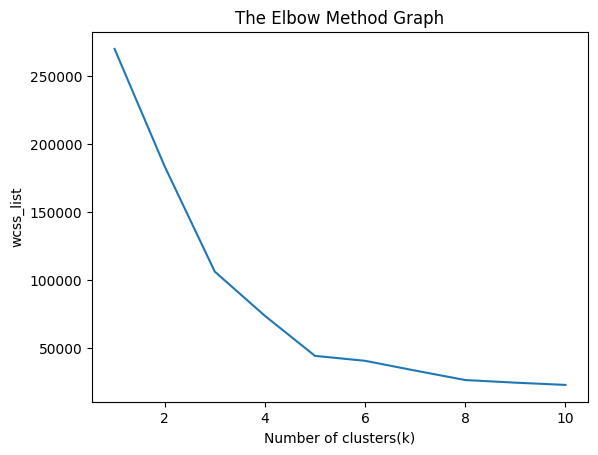

In [16]:
#finding optimal number of clusters using the elbow method 
from sklearn.cluster import KMeans 
wcss_list= [] #Initializing the list for the values of WCSS  
#Using for loop for iterations from 1 to 10. 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42) 
    kmeans.fit(x) 
    wcss_list.append(kmeans.inertia_) 
mtp.plot(range(1, 11), wcss_list) 
mtp.title('The Elbow Method Graph') 
mtp.xlabel('Number of clusters(k)') 
mtp.ylabel('wcss_list') 
mtp.show() 

In [17]:
#training the K-means model on a dataset 
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42) 
y_predict= kmeans.fit_predict(x) 

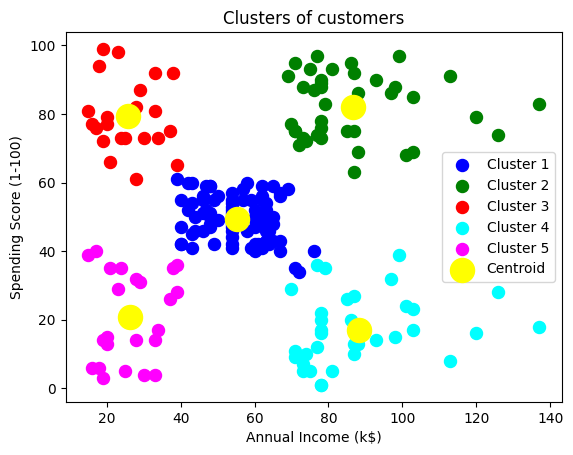

In [18]:
#visulaizing the clusters 
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 75, c = 'blue', label= 'Cluster 1') #for first cluster 
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 75, c = 'green', label= 'Cluster 2') #for second cluster 
mtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 75, c = 'red', label = 'Cluster 3') #for third cluster 
mtp.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 75, c = 'cyan', label= 'Cluster 4') #for fourth cluster 
mtp.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 75, c = 'magenta', label = 'Cluster 5') #for fifth cluster 
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,c = 'yellow', label = 'Centroid') 
mtp.title('Clusters of customers') 
mtp.xlabel('Annual Income (k$)') 
mtp.ylabel('Spending Score (1-100)') 
mtp.legend() 
mtp.show()